# Hands on : Using MaBoSS with pyMaBoSS

First we import MaBoSS

In [4]:
import maboss

## Montagud Prostate Cancer

The model can be considered as a model of healthy prostate cells when no mutants (or fused genes) are present. We refer to this model as the wild type model. 

Link to the article : https://elifesciences.org/articles/72626

### Loading the model

In [126]:
MODEL_BND = "models/Montagud2022_Prostate_Cancer.bnd"
MODEL_CFG = "models/Montagud2022_Prostate_Cancer.cfg"

First, we need to load the model to create a Simulation. Here is pyMaBoSS' documentation regarding the loading a model : https://pymaboss.readthedocs.io/en/latest/api/load.html

Fill the next block to store the simulation in the variable model_prostate

In [127]:
model_prostate = maboss.load(MODEL_BND, MODEL_CFG)

The Simulation object has several objects or methods that you can use. Here is the documentation : https://pymaboss.readthedocs.io/en/latest/api/simulation.html

You can also use python help() command to get the same information (without proper formatting unfortunately)

In [128]:
# help(model_prostate)

### Run the default simulation

Now that the simulation is created, we can already simulate the default case, without changing any settings. 

Here is the documentation of the function to run a simulation : https://pymaboss.readthedocs.io/en/latest/api/simulation.html#maboss.simulation.Simulation.run

Fill the next block to run the simulation and store the result in the res_prostate variable

In [129]:
res_prostate = model_prostate.run()

The Result object has many options to access the results, or visualize them. Here is the documentation : https://pymaboss.readthedocs.io/en/latest/api/result.html

### Print results

Now that we simulated the model, we can visualize the results. The simplest kind of result that we often look is the states probability distribution of last time point. Fill the next block to visualize it :

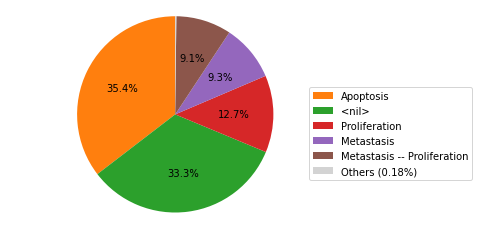

In [130]:
res_prostate.plot_piechart()

We can also plot not only the last state, but the whole trajectory of the states probability distribution. Fill the next block to visualize it : 

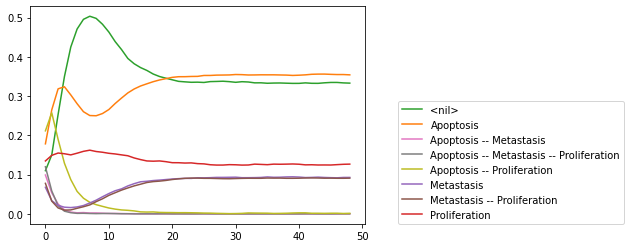

In [131]:
res_prostate.plot_trajectory()

### Printing the list of nodes

One important variable of the Simulation is the Network, which stores all of the information on the Boolean network. Here is the documentation related to the Network object : https://pymaboss.readthedocs.io/en/latest/api/network.html. It allows to modify initial states, or to set output nodes (which nodes will be part of the results), and can be accessed by using Simulation.Network, for example : model_prostate.network.  

If we want to perform modifications on the model (changing output nodes, initial values, or simulating mutants), one important information is the list of the nodes of the model. You can print them with the following command :

In [132]:
print(model_prostate.network.names)

['Acidosis', 'AKT', 'AMPK', 'AMP_ATP', 'Androgen', 'APAF1', 'Apoptosis', 'AR', 'AR_ERG', 'ATM', 'ATR', 'AXIN1', 'BAD', 'Bak', 'BAX', 'BCL2', 'Bcl_XL', 'beta_catenin', 'BIRC5', 'BMP2', 'BRCA1', 'BRCA2', 'Carcinogen', 'Caspase3', 'Caspase8', 'Caspase9', 'CDH2', 'cFLAR', 'CHK1_2', 'COX4I2', 'CyclinB', 'CyclinD', 'CytoC', 'DAXX', 'DNA_Damage', 'DNA_Repair', 'Dsh', 'E2F1', 'eEF2', 'eEF2K', 'EGF', 'EGFR', 'EMT', 'EP300', 'ERG', 'ERK', 'ETS1', 'ETV1', 'EZH2', 'E_cadherin', 'FADD', 'FGF', 'FGFR3', 'FOS', 'FOXA1', 'FOXO', 'FRS2', 'fused_event', 'GADD45', 'GLI', 'GLUT1', 'GSH', 'GSK3', 'HIF1', 'HSPs', 'Hypoxia', 'IDH1', 'IKK', 'Invasion', 'JNK', 'JUN', 'Lactic_acid', 'LDHA', 'MAP3K1_3', 'MDM2', 'MED12', 'MEK1_2', 'Metastasis', 'Migration', 'mTORC1', 'mTORC2', 'MXI1', 'MYC', 'MYC_MAX', 'NCOA3', 'NCOR1', 'NCOR2', 'NF1', 'NF_kB', 'NKX3_1', 'Nutrients', 'p14ARF', 'p15', 'p21', 'p38', 'p53', 'p70S6kab', 'p90RSK', 'PDK1', 'PHDs', 'PI3K', 'PIP3', 'PKC', 'Proliferation', 'PTCH1', 'PTEN', 'RAF', 'RAGS', 

### Simulating the Wild Type

The default simulation use all the possible combinations of input nodes, in order to show all the possible phenotypes. Now suppose we want to simulate the healthy condition for this model. It is defined in the paper as : 

*These healthy cells mostly exhibit quiescence (neither proliferation nor apoptosis) in the absence of any input (Figure 3A)*

So in this case, we need to inactivate all the inputs. We provide here the list of inputs, created by listing all the inputs nodes in the interaction graph.

In [123]:
input_nodes = ['EGF', 'FGF', 'Androgen', 'TGFb', 'Hypoxia', 'Nutrients', 'Carcinogen', 'fused_event', 'Acidosis', 'SPOP', 'TNFalpha']

Here is the documentation of the function to set new initial values : https://pymaboss.readthedocs.io/en/latest/api/network.html#maboss.network.Network.set_istate

Complete the next block to set the initial states of all the nodes to zero : 

In [142]:
model_prostate_zero = model_prostate.copy()
for node in input_nodes:
    model_prostate_zero.network.set_istate(node, [1, 0])

With all nodes initial values to zero, we can now simulate the model and print the trajectories of the node probabilities to reproduce Figure 3A of the article

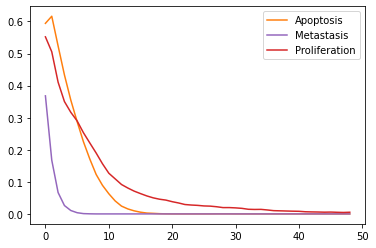

In [143]:
res_prostate_zero = model_prostate_zero.run()
res_prostate_zero.plot_node_trajectory()

### Simulating the growth condition

Now we want to simulate a case where cells are proliferating. To do this, we need to activate the input nodes which will trigger this phenotype. It is defined in the paper as : 

*When Nutrients and growth factors (EGF or FGF) are present, Proliferation is activated *

In [148]:
prostate_growth = model_prostate_zero.copy()

Using the same function as previously, complete the next block to set new initial values : 

In [164]:
prostate_growth.network.set_istate('EGF', [0, 1])
prostate_growth.network.set_istate('Nutrients', [0, 1])

Then simulate the model, and plot the state probability distributions of the last time point to verify that we obtain a proliferative phenotype.

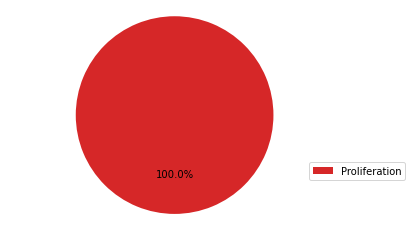

In [169]:
res_prostate_growth = prostate_growth.run()
res_prostate_growth.plot_piechart()

### Simulating MYC_MAX mutant on proliferative phenotype

Now we want to reproduce one result on this model : MYC_MAX inhibition will inhibit the proliferative phenotype (Appendix 1—figure 34)

In [32]:
mutant_prostate_growth = prostate_growth.copy()

To simulate the inhibition of a node, we need to use the mutate function : https://pymaboss.readthedocs.io/en/latest/api/simulation.html#maboss.simulation.Simulation.mutate

Fill the next block to modify the simulation mutant_prostate_growth to simulate an inhibition on the MYC_MAX node : 

In [40]:
mutant_prostate_growth.mutate("MYC_MAX", "OFF")

Then run the simulation, and plot the state probability distribution of the final state : 

In [21]:
res_mutant_prostate_growth = mutant_prostate_growth.run()

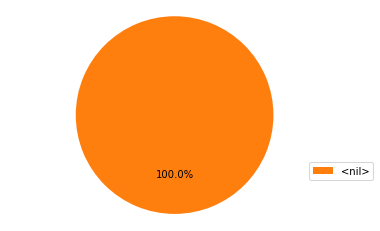

In [22]:
res_mutant_prostate_growth.plot_piechart()

### Checking multiple single node mutants 

Now we want to test multiple mutants, to try to find other interesting mutations which would reduce or block proliferation. pyMaBoSS propose methods to help with this : https://pymaboss.readthedocs.io/en/latest/api/sensitivity_api.html

First, we import these functions : 

In [23]:
from maboss.pipelines import simulate_single_mutants, filter_sensitivity

In [24]:
help(simulate_single_mutants)

Help on function simulate_single_mutants in module maboss.pipelines:

simulate_single_mutants(model, list_nodes, sign='BOTH')
    Simulates a batch of single mutants and return an array of results
    
    :param model: the model on which to perform the simulations
    :param list_nodes: the node(s) which are to be mutated
    :param sign: which mutations to perform. "ON", "OFF", or "BOTH" (default)



In [170]:
candidates_nodes = ["AKT", "AR", "EGFR", "ERK", "MYC_MAX", "ROS"]

Fill the next block to simulate the inhibition of all these candidates

In [171]:
simulations = simulate_single_mutants(prostate_growth, candidates_nodes , "OFF")

This function returns a dictionnary with an identifier for the mutant as key, and the simulation results as a value : 

In [172]:
print(simulations)

{('AKT', 'OFF'): <maboss.result.Result object at 0x7f3b8a8601f0>, ('AR', 'OFF'): <maboss.result.Result object at 0x7f3b8a7fad00>, ('EGFR', 'OFF'): <maboss.result.Result object at 0x7f3b89c92850>, ('ERK', 'OFF'): <maboss.result.Result object at 0x7f3b89b2f0a0>, ('MYC_MAX', 'OFF'): <maboss.result.Result object at 0x7f3b89b2ffa0>, ('ROS', 'OFF'): <maboss.result.Result object at 0x7f3b89c927c0>}


Now finish writing the next block with a code which plots the piechart for all of these simulations, with the identifier of the simulation as a title. 

To set the title, call plt.title('example_title') just after the piechart plotting function

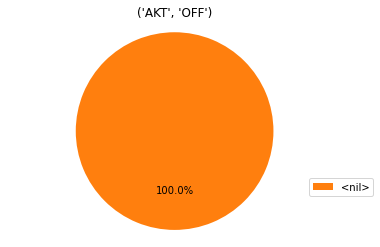

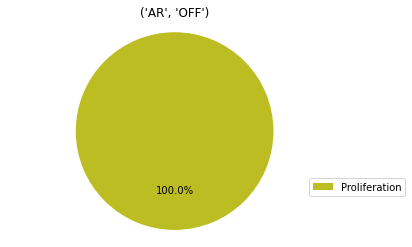

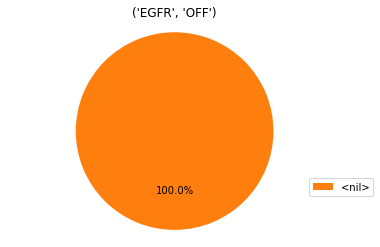

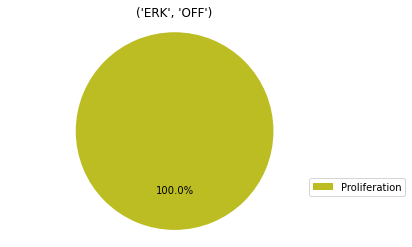

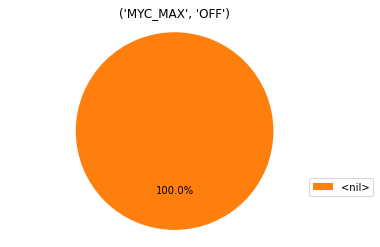

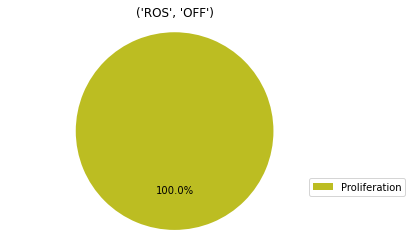

In [27]:
import matplotlib.pyplot as plt
for simulation, result in simulations.items():
    result.plot_piechart()
    plt.title(simulation)

### Filter set of results which are not proliferative

Now we can already see which results are interesting, but if we have a lot of simulation it might get handy to be able to filter the results according to their phenotypes : this is what the **filter_sensitivity** function is for.

In [28]:
help(filter_sensitivity)

Help on function filter_sensitivity in module maboss.pipelines:

filter_sensitivity(results, state=None, node=None, minimum=None, maximum=None)
    Filter a list of results by state of nodes value
    
    :param results: the list of results to filter
    :param state: the state on which to apply the filter (default None)
    :param node: the state on which to apply the filter (default None)
    :param minumum: the minimal value of the node (default None)
    :param maximum: the maximal value of the node (default None)
    
    Example : 
    
    Filtering results showing more than 50% for Proliferation node
    >>> res_ensemble = filter_sensitivity(results, node='Proliferation', maximum=0.5)
    
    Filtering results showing more than 10% for Apoptosis -- NonACD state
    >>> res_ensemble = filter_sensitivity(results, state='Apoptosis -- NonACD', minimum=0.1)



In the next block, filter the previous results to only select those without any proliferation

In [30]:
res_filtered = filter_sensitivity(simulations, state='Proliferation', maximum=0)

You can reuse the previous code which plots the piechart for all the filtered simulations

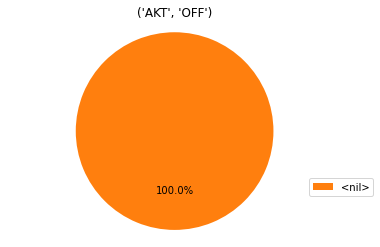

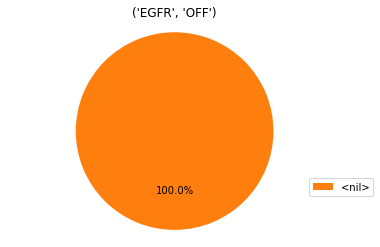

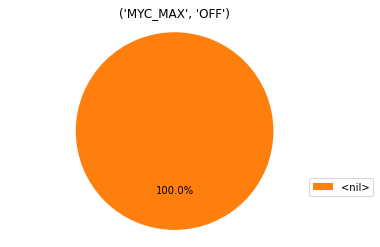

In [174]:
for simulation, result in res_filtered.items():
    result.plot_piechart()
    plt.title(simulation)

### Working with personalized models

In this article, Montagud et al. generated multiple personalized versions of the model, corresponding to patients or cell lines. Here, we're going to work with a subset of them for simplicity. 
In the next block, we build a dictionnary of models, with an identifier as key, and the Simulation object as value

In [106]:
patients_models = {}
for i in range(10):
    model_i = maboss.load(
        "models/prostate_models/PC_20191219_TCGA_mutCNA_RNA_%d.bnd" % i,
        "models/prostate_models/PC_20191219_TCGA_mutCNA_RNA_%d.cfg" % i
    )
    patients_models.update({'model_%d'%i : model_i})
patients_models

{'model_0': <maboss.simulation.Simulation at 0x7f3b8c057250>,
 'model_1': <maboss.simulation.Simulation at 0x7f3b8bf1aee0>,
 'model_2': <maboss.simulation.Simulation at 0x7f3b8a1bfc10>,
 'model_3': <maboss.simulation.Simulation at 0x7f3b8a203b80>,
 'model_4': <maboss.simulation.Simulation at 0x7f3b8a2877f0>,
 'model_5': <maboss.simulation.Simulation at 0x7f3b8ab74f70>,
 'model_6': <maboss.simulation.Simulation at 0x7f3b8aa42d30>,
 'model_7': <maboss.simulation.Simulation at 0x7f3b89929eb0>,
 'model_8': <maboss.simulation.Simulation at 0x7f3b897591f0>,
 'model_9': <maboss.simulation.Simulation at 0x7f3b89523e80>}

Now in the next block, simulate all of these models, and build a panda DataFrame with the state probability distribution of the last time point, for all the models

In [98]:
import pandas
last_states = pandas.DataFrame()
for name, model in patients_models.items():
    res = model.run()
    last_state = res.get_last_states_probtraj()
    
    last_state.index = [name]
    last_states = pandas.concat([last_states, last_state])

In [99]:
last_states

,<nil>,Apoptosis,Apoptosis -- Proliferation,Apoptosis -- Quiescence,Proliferation,Proliferation -- Quiescence,Quiescence
model_0,0.001810,0.212600,0.000200,0.000400,0.319948,0.000709,0.464333
model_1,0.002977,0.135201,0.009929,0.006046,0.341369,0.001346,0.503132
model_2,0.011158,0.383903,0.019466,0.007040,0.048759,0.002351,0.527323
model_3,0.005770,0.025800,0.012000,NaN,0.289956,0.005082,0.661392
model_4,0.001738,0.000400,NaN,NaN,0.014528,0.003907,0.979426
model_5,0.009011,0.198506,0.012265,0.003346,0.049208,0.002824,0.724840
model_6,0.007439,0.404426,0.080145,0.002196,0.107413,0.003245,0.395137
model_7,0.007127,0.119243,0.003200,0.001400,0.193702,0.002600,0.672728
model_8,0.006714,0.183271,0.003600,0.004195,0.079311,0.004214,0.718695
model_9,0.009955,0.291753,0.008096,0.011543,0.172686,0.003192,0.502776


We can observe a lot of variations in the obtained phenotypes.

Now let's go back to our initial problem : the inhibition of the proliferative phenotype. Fill the next block by building a similar array, but this time simulating the proliferative phenotype with a MYC_MAX inhibition. 

In [103]:
import pandas
last_states = pandas.DataFrame()
for name, model in patients_models.items():
    t_model = model.copy()
    t_model.network.set_istate('EGF', [0, 1])
    t_model.network.set_istate('Nutrients', [0, 1])
    t_model.mutate('MYC_MAX', 'OFF')
    res = t_model.run()
    last_state = res.get_last_states_probtraj()
    
    last_state.index = [name]
    last_states = pandas.concat([last_states, last_state])

In [104]:
last_states

,Apoptosis,Apoptosis -- Quiescence,Proliferation,Proliferation -- Quiescence,Quiescence,<nil>,Apoptosis -- Proliferation
model_0,0.212800,0.000200,0.327600,0.000200,0.459200,NaN,NaN
model_1,0.145773,0.003258,0.253000,0.001317,0.593354,0.002497,0.000800
model_2,0.398825,0.006239,0.020800,0.001320,0.555931,0.014886,0.002000
model_3,0.031212,0.000200,0.026521,0.002690,0.932292,0.005284,0.001800
model_4,0.000400,NaN,NaN,NaN,0.999600,NaN,NaN
model_5,0.196995,0.002653,0.005000,0.000450,0.786552,0.006151,0.002200
model_6,0.392238,0.003066,0.115638,0.002815,0.393369,0.006513,0.086362
model_7,0.104641,0.000776,0.227487,0.003005,0.657791,0.004216,0.002083
model_8,0.182578,0.003922,0.073974,0.002924,0.725500,0.006103,0.005000
model_9,0.281183,0.009679,0.177357,0.001346,0.518038,0.007153,0.005243


Now filter this dataframe to only show the personalized models which show less than 10% of Proliferation

In [105]:
last_states[last_states['Proliferation'] < 0.1]

,Apoptosis,Apoptosis -- Quiescence,Proliferation,Proliferation -- Quiescence,Quiescence,<nil>,Apoptosis -- Proliferation
model_2,0.398825,0.006239,0.020800,0.001320,0.555931,0.014886,0.0020
model_3,0.031212,0.000200,0.026521,0.002690,0.932292,0.005284,0.0018
model_5,0.196995,0.002653,0.005000,0.000450,0.786552,0.006151,0.0022
model_8,0.182578,0.003922,0.073974,0.002924,0.725500,0.006103,0.0050
